# RNN - LSTM

Predicting next numbers in a sequence of number

RNNs have truly changed the way sequential data is forecasted
#### The main differece of LSTM from RNN is that LSTM can store data longer than RNN.

### Recurrent Neural Networks
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

Let me give you the best explanation of Recurrent Neural Networks that I found on internet: https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

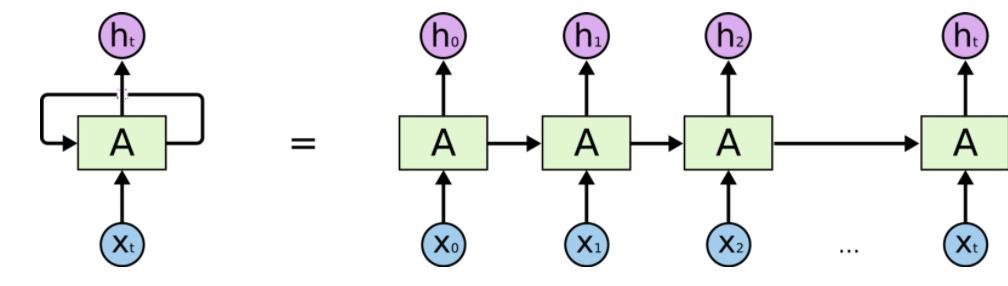

In [1]:
from IPython.display import Image
Image(filename = 'D:/WORK/RNN/RNN1.PNG', width = 700, height = 800)

Now, even though RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).


#### What is Vanishing Gradient problem?
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

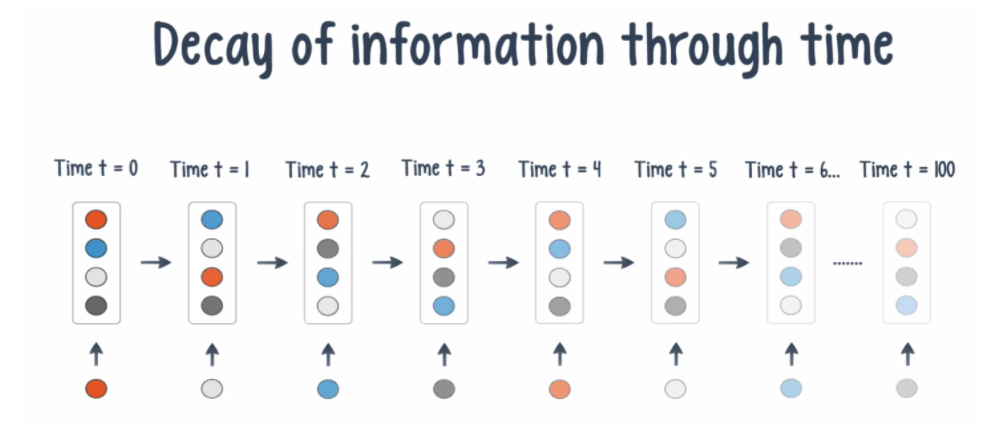

In [2]:
from IPython.display import Image
Image(filename = 'D:/WORK/RNN/RNN2.PNG', width = 700, height = 800)

#### Long Short Term Memory(LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

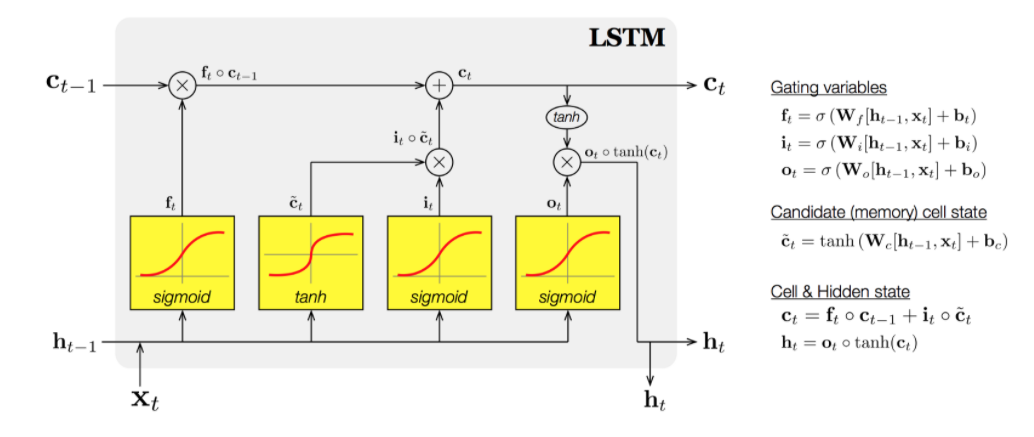

In [3]:
from IPython.display import Image
Image(filename = 'D:/WORK/RNN/RNN3.PNG', width = 700, height = 800)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

#### Components of LSTMs
So the LSTM cell contains the following components

Forget Gate “f” ( a neural network with sigmoid)
Candidate layer “C"(a NN with Tanh)
Input Gate “I” ( a NN with sigmoid )
Output Gate “O”( a NN with sigmoid)
Hidden state “H” ( a vector )
Memory state “C” ( a vector)

Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)


Working of gates in LSTMs
First, LSTM cell takes the previous memory state Ct-1 and does element wise multiplication with forget gate (f) to decide if present memory state Ct. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

Ct = Ct-1 * ft

Calculating the new memory state:

Ct = Ct + (It * C`t)

Now, we calculate the output:

Ht = tanh(Ct)

### Lets start with basic implementation of LSTM

In [191]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [192]:
data = [[[(i+j)] for i in range(5)]for j in range(100)]
target = [(i+5) for i in range(100)]

In [193]:
data

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]],
 [[5], [6], [7], [8], [9]],
 [[6], [7], [8], [9], [10]],
 [[7], [8], [9], [10], [11]],
 [[8], [9], [10], [11], [12]],
 [[9], [10], [11], [12], [13]],
 [[10], [11], [12], [13], [14]],
 [[11], [12], [13], [14], [15]],
 [[12], [13], [14], [15], [16]],
 [[13], [14], [15], [16], [17]],
 [[14], [15], [16], [17], [18]],
 [[15], [16], [17], [18], [19]],
 [[16], [17], [18], [19], [20]],
 [[17], [18], [19], [20], [21]],
 [[18], [19], [20], [21], [22]],
 [[19], [20], [21], [22], [23]],
 [[20], [21], [22], [23], [24]],
 [[21], [22], [23], [24], [25]],
 [[22], [23], [24], [25], [26]],
 [[23], [24], [25], [26], [27]],
 [[24], [25], [26], [27], [28]],
 [[25], [26], [27], [28], [29]],
 [[26], [27], [28], [29], [30]],
 [[27], [28], [29], [30], [31]],
 [[28], [29], [30], [31], [32]],
 [[29], [30], [31], [32], [33]],
 [[30], [31], [32], [33], [34]],
 [[31], [32], [33

In [194]:
target

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104]

In [195]:
#Normalizing
data = [[[(i+j)/100] for i in range(5)]for j in range(100)]
target = [(i+5)/100 for i in range(100)]

In [196]:
# Converting data and target to numpy arrays

data=np.array(data, dtype=float)
target=np.array(target, dtype=float)

In [197]:
data.shape

(100, 5, 1)

In [198]:
data

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


In [199]:
target.shape

(100,)

In [200]:
target

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,
       0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 ,
       0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81,
       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03,
       1.04])

In [201]:
X_train,X_test,y_train,y_test= train_test_split(data,target, test_size=0.2, random_state=4)

In [202]:
# RNN

model = Sequential()

model.add(LSTM((1),batch_input_shape=(None,5,1), return_sequences=False))

In [203]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [204]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [205]:
history=model.fit(X_train,y_train, epochs=300, validation_data=(X_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/300
80/80 [==============================] - 1s 8ms/step - loss: 0.3529 - accuracy: 0.0000e+00 - val_loss: 0.2820 - val_accuracy: 0.0000e+00
Epoch 2/300
80/80 [==============================] - 0s 163us/step - loss: 0.3501 - accuracy: 0.0000e+00 - val_loss: 0.2792 - val_accuracy: 0.0000e+00
Epoch 3/300
80/80 [==============================] - 0s 162us/step - loss: 0.3469 - accuracy: 0.0000e+00 - val_loss: 0.2762 - val_accuracy: 0.0000e+00
Epoch 4/300
80/80 [==============================] - 0s 162us/step - loss: 0.3437 - accuracy: 0.0000e+00 - val_loss: 0.2732 - val_accuracy: 0.0000e+00
Epoch 5/300
80/80 [==============================] - 0s 175us/step - loss: 0.3405 - accuracy: 0.0000e+00 - val_loss: 0.2701 - val_accuracy: 0.0000e+00
Epoch 6/300
80/80 [==============================] - 0s 175us/step - loss: 0.3372 - accuracy: 0.0000e+00 - val_loss: 0.2671 - val_accuracy: 0.0000e+00
Epoch 7/300
80/80 [==============================] -

In [206]:
results=model.predict(X_test)

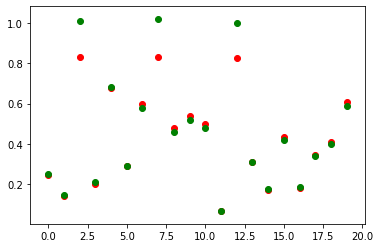

In [207]:
#Predicted = red
plt.scatter(range(20), results, c='r')
# Actual = green
plt.scatter(range(20), y_test, c='g')

plt.show()

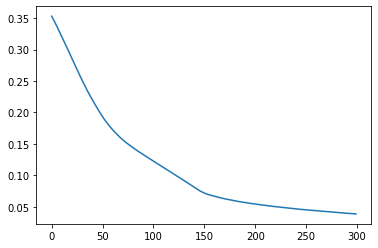

In [208]:
plt.plot(history.history['loss'])
plt.show()

# Aim - to compare to accuracies of RNN and LSTM

#### The main differece of LSTM from RNN is that LSTM can store data longer than RNN.

In [209]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#### Import Data

In [210]:
data = pd.read_csv('D:/DataAnalysis/Python/DeepLearning/Google_Stock_Price/datasets_392005_755761_Google_Stock_Price_Train.csv',sep=",")

In [211]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [212]:
# We assign column "Open" to variable "Data"
data = data.loc[:,["Open"]].values

In [213]:
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [214]:
train = data[:len(data)-50] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

In [215]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

In [216]:
test

array([[803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33],
       [782.75]])

In [217]:
# feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

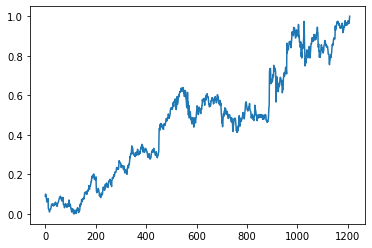

In [218]:
plt.plot(train_scaled)
plt.show()

In [219]:
train_scaled

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

In [220]:
# Training Data
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [221]:
X_train

array([[0.08886192, 0.10045847, 0.09768454, ..., 0.03806442, 0.04646325,
        0.05245415],
       [0.10045847, 0.09768454, 0.0948143 , ..., 0.04646325, 0.05245415,
        0.05399522],
       [0.09768454, 0.0948143 , 0.08267838, ..., 0.05245415, 0.05399522,
        0.05811758],
       ...,
       [0.9528818 , 0.96871629, 0.96698259, ..., 0.97210664, 0.96721375,
        0.96804207],
       [0.96871629, 0.96698259, 0.97208738, ..., 0.96721375, 0.96804207,
        0.96447835],
       [0.96698259, 0.97208738, 0.9744953 , ..., 0.96804207, 0.96447835,
        0.97998536]])

In [222]:
y_train

array([0.05399522, 0.05811758, 0.06025582, ..., 0.96447835, 0.97998536,
       1.        ])

In [223]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

## RNN

In [224]:
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting 

In [225]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation. 
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

In [226]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1158/1158 [==============================] - 3s 2ms/step - loss: 0.4371
Epoch 2/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.3526
Epoch 3/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.2435
Epoch 4/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.1971
Epoch 5/100
1158/1158 [==============================] - 2s 1ms/step - loss: 0.1673
Epoch 6/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.1269
Epoch 7/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.1006
Epoch 8/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.0806
Epoch 9/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.0693
Epoch 10/100
1158/1158 [==============================] - 1s 1ms/step - loss: 0.0567
Epoch 11/100
1158/1158 [==============================] - 2s 1ms/step - loss: 0.0527
Epoch 12/100
1158/1158 [==============================] - 2s 1ms/step - lo

In [227]:
inputs = data[len(data) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [228]:
# Testing Data
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])
    #y_test.append(train_scaled[i,0])
    
#X_test, y_test = np.array(X_train), np.array(y_train)
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [229]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

#### What did we do? We learnt our model with train data and then we tried to predict next 50 data. Then we compared predictions with our test (real)(y_test) data.

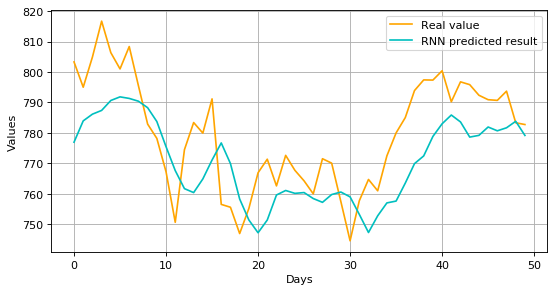

In [230]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## LSTM

In [231]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [232]:
model = Sequential()

model.add(LSTM(10, input_shape=(None,1))) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).

model.add(Dense(1))

In [233]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
1158/1158 [==============================] - 19s 17ms/step - loss: 0.0023 
Epoch 2/50
1158/1158 [==============================] - 19s 17ms/step - loss: 7.0392e-04
Epoch 3/50
1158/1158 [==============================] - 20s 17ms/step - loss: 6.3301e-04
Epoch 4/50
1158/1158 [==============================] - 20s 17ms/step - loss: 5.6746e-04
Epoch 5/50
1158/1158 [==============================] - 20s 17ms/step - loss: 5.1354e-04
Epoch 6/50
1158/1158 [==============================] - 20s 17ms/step - loss: 4.9938e-04
Epoch 7/50
1158/1158 [==============================] - 20s 17ms/step - loss: 4.3787e-04
Epoch 8/50
1158/1158 [==============================] - 20s 17ms/step - loss: 4.1916e-04
Epoch 9/50
1158/1158 [==============================] - 20s 18ms/step - loss: 4.2559e-04
Epoch 10/50
1158/1158 [==============================] - 20s 17ms/step - loss: 3.7230e-04
Epoch 11/50
1158/1158 [==============================] - 20s 17ms/step - loss: 3.7480e-04
Epoch 12/50
1158/1158 

In [234]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

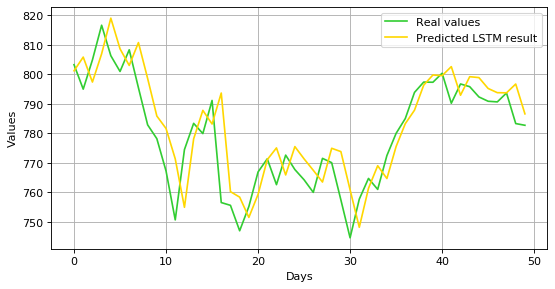

In [235]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## Visualization of RNN vs LSTM

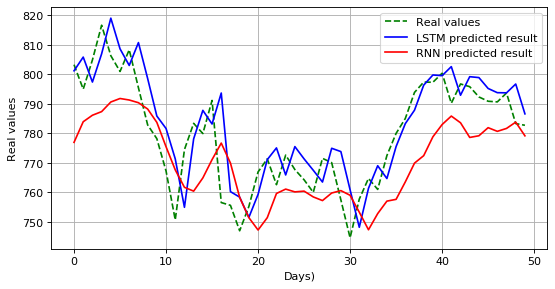

In [236]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()

#### LSTM looks greatly successful from the RNN.